# HW-3 - Classification
In this homework, we will use the Car price dataset. Download it from here:

https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task.

## 1. Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

## 2. Import dataset

For the rest of the homework, you'll need to use only these columns:

`[Make, Model, Year, Engine HP, Engine Cylinders, Transmission Type, Vehicle Style, highway MPG, city mpg]`


In [2]:
cols = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders", "Transmission Type",
        "Vehicle Style", "highway MPG", "city mpg", "MSRP"]
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
dff = pd.read_csv(url, usecols=cols)

In [3]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [4]:
dff.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


### Data preparation

- Select only the features from above and transform their names using next line:

`data.columns = data.columns.str.replace(' ', '_').str.lower()`

In [5]:
dff.columns = dff.columns.str.replace(' ', '_').str.lower()
dff.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

- Fill in the missing values of the selected features with 0.

In [6]:
dff.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [7]:
dff["engine_hp"].fillna(value=0, inplace=True)
dff["engine_cylinders"].fillna(value=0, inplace=True)

In [8]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


- Rename `MSRP` variable to `price`.

In [9]:
dff.columns = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price']
dff.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

In [10]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


## Question 1

What is the **most frequent** observation (mode) for the column `transmission_type`?

<u>**`AUTOMATIC`**</u> \
`MANUAL` \
`AUTOMATED_MANUAL` \
`DIRECT_DRIVE`

In [11]:
# One way to find the most frequent observation is by counting the values of the column
dff["transmission_type"].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [12]:
# Another way is by using the method '.mode()'
dff["transmission_type"].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

- What is the **most frequent** observation (mode) for the column `transmission_type`? = <u>**`AUTOMATIC`**</u>

## Question 2

- Create the **correlation matrix** for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the **biggest** correlation in this dataset? \
`engine_hp` & `year` \
`engine_hp` & `engine_cylinders` \
`highway_mpg` & `engine_cylinders` \
<u>**`highway_mpg`** & **`city_mpg`**</u>

In [13]:
numeric_cols = dff.select_dtypes(include=['int', 'float']).columns.tolist()

In [14]:
dff[numeric_cols].corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


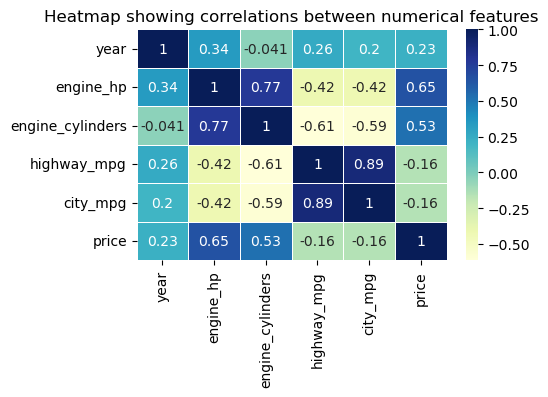

In [15]:
plt.figure(figsize=(5,3))
sns.heatmap(dff[numeric_cols].corr(), cmap="YlGnBu", annot=True, linewidths=0.5);
plt.title('Heatmap showing correlations between numerical features')
plt.show()

- What are the two features that have the **biggest** correlation in this dataset? = <u>**`highway_mpg`** & **`city_mpg`**</u>

# Make price binary

- Now we need to turn the `price` variable from numeric into a binary format.
- Let's create a variable `above_average` which is **1** if the `price` is above its **mean** value and **0** otherwise.

In [16]:
dff_bin = dff.copy()
mean = dff_bin["price"].mean()
dff_bin["above_average"] = np.where(dff_bin["price"]>=mean, 1, 0)
dff_bin.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [17]:
dff_bin["above_average"] = dff_bin["above_average"].astype(str) #pd.(dff_bin.above_average)
dff_bin.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
above_average         object
dtype: object

In [18]:
dff_bin = dff_bin.drop("price", axis=1)
dff_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   above_average      11914 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 930.9+ KB


In [22]:
# Extract the categorical variables
cat_cols = dff_bin.select_dtypes(include=['object']).columns.tolist()[0:-1]
cat_cols

['make', 'model', 'transmission_type', 'vehicle_style']

In [23]:
# Convert type of the categorical columns
dff_bin[cat_cols] = dff_bin[cat_cols].astype("category")
dff_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   make               11914 non-null  category
 1   model              11914 non-null  category
 2   year               11914 non-null  int64   
 3   engine_hp          11914 non-null  float64 
 4   engine_cylinders   11914 non-null  float64 
 5   transmission_type  11914 non-null  category
 6   vehicle_style      11914 non-null  category
 7   highway_mpg        11914 non-null  int64   
 8   city_mpg           11914 non-null  int64   
 9   above_average      11914 non-null  object  
dtypes: category(4), float64(2), int64(3), object(1)
memory usage: 658.5+ KB


# Split the data

- Split your data in train/val/test sets with 60% / 20% / 20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the **seed** to **42**.
- Make sure that the target value (`price`) is not in your dataframe.

In [24]:
# Define the 'target' variable, the 'X' & 'y' dataframes
target = ["above_average"]
X = dff_bin.drop(target, axis=1)
y = dff_bin[target]

In [25]:
# Use the train_test_split function of scikit-learn to split dataframes 'X' & 'y'
X_0, X_test, y_0, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# X_0 & y_0 are then splitted into train/val subsets
X_train, X_val, y_train, y_val = train_test_split(X_0, y_0, test_size=0.25, random_state=42)

In [26]:
# Reset the index of the train/validation/test subsets
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [27]:
X_train.shape, X_val.shape, X_test.shape

((7148, 9), (2383, 9), (2383, 9))

## Question 3

- Calculate the **mutual information score** between `above_average` and other categorical variables in our dataset. Use the **training set** only.
- Round the scores to 2 decimals using `round(score, 2)`.
- Which of these variables has the **lowest** mutual information score? \
`make` \
`model` \
<u>**`transmission_type`**</u> \
`vehicle_style`

In [28]:
# Extract the categorical variables
cat_cols = dff_bin.select_dtypes(include=['category']).columns.tolist()
cat_cols

['make', 'model', 'transmission_type', 'vehicle_style']

In [29]:
X_train[cat_cols[0]] # Validating the shape of the X_train dataset

0        Mitsubishi
1               Kia
2       Lamborghini
3         Chevrolet
4           Pontiac
           ...     
7143         Toyota
7144      Chevrolet
7145        Hyundai
7146     Mitsubishi
7147           Ford
Name: make, Length: 7148, dtype: category
Categories (48, object): ['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', ..., 'Tesla', 'Toyota', 'Volkswagen', 'Volvo']

In [30]:
y_train.iloc[:,0] # Validating the shape of the y_train column

3972     0
1997     0
5216     1
2805     0
11369    0
        ..
9232     0
5710     0
11306    0
4414     0
10286    0
Name: above_average, Length: 7148, dtype: object

In [31]:
# Calculate the mutual information score
mi_dict = {}
for i in cat_cols[0:-1]:
    mi_dict[i] = round(mutual_info_score(X_train[i], y_train.iloc[:,0]),2)
      
mi_dict

{'make': 0.24, 'model': 0.46, 'transmission_type': 0.02}

In [33]:
# The maximum value of the mutual info. score
print(f'{min(mi_dict, key=mi_dict.get)}: {min(mi_dict.values())}')

transmission_type: 0.02


- Mutual info score calculation based on the function provided in the video lectures

In [34]:
# Creating the X_train, X_val, X_test datasets with full columns
Xf = dff_bin.copy()
X_0, Xf_test = train_test_split(Xf, test_size=0.2, random_state=42) 
Xf_train, Xf_val = train_test_split(X_0, test_size=0.25, random_state=42)

In [35]:
# Defining the function
def calculate_mi(series):
    return round(mutual_info_score(series, Xf_train.above_average), 2)

In [36]:
# Apply the function to all the categorical variables
mut_info = Xf_train[cat_cols].apply(calculate_mi)
mut_info.sort_values()

transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

It is obtained the same result: **`transmission_type`** has the **lowest** mutual information score.

- Which of these variables has the **lowest** mutual information score? = <u>**`transmission_type`**</u>

# Question 4

- Now let's train a **logistic regression**.
- Remember that we have several categorical variables in the dataset. Include them using **one-hot encoding**.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:\
`model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
- What **accuracy** did you get? \
`0.60` \
`0.72` \
`0.84` \
<u>**`0.95`**</u>

### One-hot encoding

In [37]:
# Calculate the different categories in each categorical variable
for i in cat_cols:
    print(f'{i}: {len(dff_bin[i].value_counts())}')

make: 48
model: 915
transmission_type: 5
vehicle_style: 16


In [38]:
# Create a list with all the columns
all_cols = X_train.columns.to_list()
all_cols

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

- OHE over the `X_train` set (obtained **after** splitting)

In [39]:
# Dictionary for the X_train set
train_dicts = X_train[all_cols].to_dict(orient='records')

In [52]:
# Apply One-hot encoding to X_train
dv = DictVectorizer(sparse=False)
X_train_oh = dv.fit_transform(train_dicts)
X_train_oh.shape

(7148, 943)

- OHE over the full dataset (it is, obtained **before** splitting)

In [47]:
# 1. Apply One-Hot Encoding for the complete dataset
target = ["above_average"]
dff_X = dff_bin.drop(target, axis=1)
dff_y = dff_bin[target]
dff_dicts = dff_X[all_cols].to_dict(orient='records')

# Instantiate the 'DictVectorizer'
dv1 = DictVectorizer(sparse=False)
dff_X_oh = dv1.fit_transform(dff_dicts)
dff_X_oh.shape

(11914, 989)

In [48]:
# 2. Split the dff_oh dataset into train-val-test
X_0_oh, X_test_2, y_0_oh, y_test_2 = train_test_split(dff_X_oh, dff_y, test_size=0.2, random_state=42) 
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_0_oh, y_0_oh, test_size=0.25, random_state=42)
X_train_2.shape, X_val_2.shape, X_test_2.shape

((7148, 989), (2383, 989), (2383, 989))

### Train Logistic Regression Model

- 1. Train-Fit Model over the `X_train_oh` (OHE obtained **after** splitting)

In [49]:
# Instantiate and Fit the Model over X_train_oh
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train_oh, y_train.iloc[:,0])

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

- 2. Train-Fit Model over `X_train_2` (OHE obtained **before** splitting)

In [50]:
# Instantiate and Fit the Model over X_train_2
model_2 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model_2.fit(X_train_2, y_train_2.iloc[:,0])

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

### Accuracy on the validation dataset

- 1. Accuracy for **`model`**

In [53]:
# 1. Apply One-hot encoding to X_val
val_dicts = X_val[all_cols].to_dict(orient='records')
X_val_oh = dv.transform(val_dicts)
X_val_oh.shape

(2383, 943)

In [54]:
# 2. Predict Values with 'model' on X_val_oh
y_pred = model.predict(X_val_oh)
y_pred

array(['0', '1', '0', ..., '0', '1', '1'], dtype=object)

In [55]:
# 3. Calculate accuracy score for 'model'
accuracy = accuracy_score(y_val.iloc[:,0], y_pred)
print(accuracy, round(accuracy,2))

0.9345362987830466 0.93


- 2. Accuracy for **`model_2`**

In [56]:
# 1. Predict Values with 'model_2' on X_val_2
y_pred_2 = model_2.predict(X_val_2)
y_pred_2

array(['0', '1', '0', ..., '0', '1', '1'], dtype=object)

In [57]:
# 2. Calculate 'accuracy_2' score for 'model_2'
accuracy_2 = accuracy_score(y_val_2.iloc[:,0], y_pred_2)
print(f'{accuracy_2}, {round(accuracy_2,2)}')

0.9458665547629039, 0.95


- What **accuracy** did you get? = <u>**`0.95`**</u>

# Question 5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the **smallest** difference? \
`year` \
`engine_hp` \
<u>**`transmission_type`**</u> \
`city_mpg`

In [58]:
orig_score = round(accuracy,2)
score_dict = {}

for c in all_cols:
    subset = all_cols.copy()
    subset.remove(c)
    
    train_dicts_fi = X_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dicts_fi)

    X_train_oh_fi = dv.transform(train_dicts_fi)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_oh_fi, y_train.iloc[:,0])

    val_dicts_fi = X_val[subset].to_dict(orient='records')
    X_val_oh_fi = dv.transform(val_dicts_fi)

    y_pred_fi = model.predict(X_val_oh_fi)

    score = round(accuracy_score(y_val.iloc[:,0], y_pred_fi), 2)
    score_dict[c] = abs(orig_score - score)
    
    print(f'For {c}, difference is: {abs(orig_score - score)}, ({score})')

For make, difference is: 0.009999999999999898, (0.94)
For model, difference is: 0.010000000000000009, (0.92)
For year, difference is: 0.019999999999999907, (0.95)
For engine_hp, difference is: 0.010000000000000009, (0.92)
For engine_cylinders, difference is: 0.009999999999999898, (0.94)
For transmission_type, difference is: 0.009999999999999898, (0.94)
For vehicle_style, difference is: 0.009999999999999898, (0.94)
For highway_mpg, difference is: 0.009999999999999898, (0.94)
For city_mpg, difference is: 0.019999999999999907, (0.95)


In [59]:
diff_score = pd.DataFrame.from_dict(score_dict, orient='index')
diff_score.sort_values(by=0)

,0
make,0.01
engine_cylinders,0.01
transmission_type,0.01
vehicle_style,0.01
highway_mpg,0.01
model,0.01
engine_hp,0.01
year,0.02
city_mpg,0.02


- Which of following feature has the **smallest** difference? <u>**`transmission_type`**</u>

# Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
- Fit the `Ridge` regression model on the training data with a solver `sag`. Set the `seed` to `42`.
- This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
- Round your `RMSE` scores to 3 decimal digits.
- Which of these `alphas` leads to the best **RMSE** on the validation set? \
`0` \
`0.01` \
<u>**`0.1`**</u> \
`1` \
`10`

- Apply the logarithmic transformation to column `price`.

In [60]:
# 1. Make a copy of the orginal dataset
dff_log = dff.copy()
# 2. Apply the log transformation
dff_log['price'] = np.log1p(dff_log['price'])
dff_log

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,10.739349
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,10.612779
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,10.500977
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,10.290483
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,10.448744
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,10.739024
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,10.945018
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,10.832122
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,10.838031


- One-Hot Encoding of the datasets with `DictVectorizer`

In [62]:
# Define the 'target' variable, the 'X' & 'y' dataframes
target = ["price"]
X_rr = dff_log.drop(target, axis=1)
y_rr = dff_log[target]

# Use the train_test_split function of scikit-learn to split dataframes 'X' & 'y'
X_tv, X_test_rr, y_tv, y_test_rr = train_test_split(X_rr, y_rr, test_size=0.2, random_state=42) 
# X_0 & y_0 are then splitted into train/val subsets
X_train_rr, X_val_rr, y_train_rr, y_val_rr = train_test_split(X_tv, y_tv, test_size=0.25, random_state=42)

# Reset the index of the train/validation/test subsets
X_train_rr = X_train_rr.reset_index(drop=True)
X_val_rr = X_val_rr.reset_index(drop=True)
X_test_rr = X_test_rr.reset_index(drop=True)

# Dictionary for the X_train set
train_dicts_rr = X_train_rr[all_cols].to_dict(orient='records')

# Apply One-hot encoding to X_train
dv_rr = DictVectorizer(sparse=True)
X_tr_rr_oh = dv_rr.fit_transform(train_dicts_rr)

# Apply One-hot encoding to X_val
val_dicts_rr = X_val_rr[all_cols].to_dict(orient='records')
X_vl_rr_oh = dv_rr.transform(val_dicts_rr)

In [63]:
X_vl_rr_oh.shape, X_tr_rr_oh.shape, y_val_rr.shape, y_train_rr.shape

((2383, 943), (7148, 943), (2383, 1), (7148, 1))

- Fit the `Ridge` regression model on the training data with a solver `sag`. Set the `seed` to `42`.

In [64]:
# Instantiate & Fit Ridge Model with different 'alpha' values
rmse_dict0 = {}
for a in [0, 0.01, 0.1, 1, 10]:
    model_rr = Ridge(alpha=a, solver="sag", random_state=42)
    model_rr.fit(X_tr_rr_oh, y_train_rr.iloc[:,0])
    
    y_pr_rr = model_rr.predict(X_vl_rr_oh)
    
    score_rr0 = np.sqrt(mean_squared_error(y_val_rr.iloc[:,0], y_pr_rr))
    rmse_dict0[a] = round(score_rr0, 3)
    
    print(f'alpha:{a}, rmse:{round(score_rr0, 3)}')

alpha:0, rmse:0.255
alpha:0.01, rmse:0.255
alpha:0.1, rmse:0.251
alpha:1, rmse:0.258
alpha:10, rmse:0.336


In [65]:
df_rmse0 = pd.DataFrame.from_dict(rmse_dict0, orient='index')
df_rmse0.sort_values(by=0)

,0
0.10,0.251
0.00,0.255
0.01,0.255
1.00,0.258
10.00,0.336


- Scaling the numerical features with `MinMaxScaler`, and One-Hot Encoding with Scikit-Learn `OneHotEncoder`

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [67]:
num_cols = X_train_rr.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [68]:
cat_cols

['make', 'model', 'transmission_type', 'vehicle_style']

In [69]:
# Instantiate scaler
scaler = MinMaxScaler()
X_train_num = scaler.fit_transform(X_train_rr[num_cols].values)

# Instantiate OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat = ohe.fit_transform(X_train_rr[cat_cols].values)

In [70]:
# Concatenate X_train_num & X_train_cat
X_train_sc = np.column_stack([X_train_num, X_train_cat])

In [71]:
# Apply transformers to X_val
X_val_num = scaler.transform(X_val_rr[num_cols].values)
X_val_cat = ohe.transform(X_val_rr[cat_cols].values)
X_val_sc = np.column_stack([X_val_num, X_val_cat])

In [72]:
# Instantiate & Fit Ridge Model with different 'alpha' values
rmse_dict = {}
for alpha in [0, 0.01, 0.1, 1, 10]:
    model_rr2 = Ridge(alpha=alpha, solver="sag", random_state=42)
    model_rr2.fit(X_train_sc, y_train_rr.iloc[:,0])
    
    y_pred_rr_sc = model_rr2.predict(X_val_sc)
    
    rmse_score = np.sqrt(mean_squared_error(y_val_rr.iloc[:,0], y_pred_rr_sc))
    rmse_dict[alpha] = round(rmse_score, 3)
    
    print(f'alpha:{alpha}, rmse:{round(rmse_score,3)}')

alpha:0, rmse:0.231
alpha:0.01, rmse:0.224
alpha:0.1, rmse:0.215
alpha:1, rmse:0.23
alpha:10, rmse:0.323


In [73]:
df_rmse = pd.DataFrame.from_dict(rmse_dict, orient='index')
df_rmse.sort_values(by=0)

,0
0.10,0.215
0.01,0.224
1.00,0.230
0.00,0.231
10.00,0.323


- Which of these `alphas` leads to the best **RMSE** on the validation set? = <u>**`0.1`**</u>